# 5_金融数据获取、清洗、整理和存储

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

## 1. 从不同数据来源获取——本地

### 1.1 常用：本地文件读取

In [3]:
with open('ibmclose.csv', 'r') as f:      #推荐这种方法；
    for i in range(5):
        print(f.readline())

date,price

2019/1/02,115.2099991

2019/1/03,112.9100037

2019/1/04,117.3199997

2019/1/07,118.1500015



In [4]:
f = open('ibmclose.csv', 'r')
for i in range(5):
    print(f.readline())
f.close()

date,price

2019/1/02,115.2099991

2019/1/03,112.9100037

2019/1/04,117.3199997

2019/1/07,118.1500015



In [5]:
with open('ibmclose.csv', 'r') as f:            #未打印，不然会输出大量无用信息；
    print(f.read())

date,price
2019/1/02,115.2099991
2019/1/03,112.9100037
2019/1/04,117.3199997
2019/1/07,118.1500015
2019/1/08,119.8300018
2019/1/09,120.6900024
2019/1/10,121.7900009
2019/1/11,121.4599991
2019/1/14,120.3899994
2019/1/15,121.7300034
2019/1/16,121.6200027
2019/1/17,122.1900024
2019/1/18,123.8199997
2019/1/22,122.5199966
2019/1/23,132.8899994
2019/1/24,132.5299988
2019/1/25,133.9700012
2019/1/28,134.2700043
2019/1/29,134.3300018
2019/1/30,134.3800049
2019/1/31,134.4199982
2019/2/01,134.1000061
2019/2/04,135.1900024
2019/2/05,135.5500031
2019/2/06,136.3200073
2019/2/07,133.1900024
2019/2/08,133.7100067
2019/2/11,133.9900055
2019/2/12,136.0500031
2019/2/13,137.5200043
2019/2/14,136.4799957
2019/2/15,138.0299988
2019/2/19,138.6999969
2019/2/20,138
2019/2/21,137.8399963
2019/2/22,139.25
2019/2/25,139.4600067
2019/2/26,139.7200012
2019/2/27,139.1699982
2019/2/28,138.1300049
2019/3/01,139.1999969



### 1.2 Python CSV模块读取

In [6]:
import csv

In [7]:
csv_reader = csv.reader(open('ibmclose.csv', 'r'))

In [8]:
csv_reader

In [9]:
data = [i for i in csv_reader]               #从csv_reader中读取出数据，将其解析成list；

In [10]:
type(data)

list

In [11]:
data[:5]

[['date', 'price'],
 ['2019/1/02', '115.2099991'],
 ['2019/1/03', '112.9100037'],
 ['2019/1/04', '117.3199997'],
 ['2019/1/07', '118.1500015']]

### 1.3 常用：Pandas读取CSV

In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('ibmclose.csv')

In [14]:
data = pd.read_csv('ibmclose.csv', index_col=1,
                   parse_dates=True)                #解析日期
#index_col就是我们要把dataframe第几列作为我们的索引,0就是第一列
#parse_dates就是解析日期，就变成了时间数据了，日后在做时间数据的处理就会非常方便了

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 41 entries, 115.20999909999999 to 139.1999969
Data columns (total 1 columns):
date    41 non-null object
dtypes: object(1)
memory usage: 656.0+ bytes


In [16]:
data.head()

,date
price,
115.209999,2019/1/02
112.910004,2019/1/03
117.320000,2019/1/04
118.150001,2019/1/07
119.830002,2019/1/08


In [17]:
del data['date']  ##这个时候如果我想要删除Date这一列

In [18]:
data.head()

""
price
115.209999
112.910004
117.320000
118.150001
119.830002


In [19]:
data.to_csv('000001.csv')

In [20]:
data.to_excel('000001.xlsx')

In [21]:
data.to_json('000001.json')

## 2. 从网络Open Source读取

### 2.1 Yahoo

In [23]:
from pandas_datareader import data as web

In [24]:
#不翻墙或者网速较慢可能无法从Yahoo读取，属于正常现象；
data = web.get_data_yahoo('GS', start = '2010-01-01', end = '2012-01-01')           

In [25]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,174.250000,169.509995,170.050003,173.080002,9135000.0,150.662186
2010-01-05,176.259995,172.570007,173.000000,176.139999,11659400.0,153.325790
2010-01-06,175.380005,173.759995,175.380005,174.259995,7381100.0,151.689255
2010-01-07,178.750000,173.949997,174.320007,177.669998,8727400.0,154.657593
2010-01-08,177.429993,173.949997,176.330002,174.309998,7268100.0,151.732819


In [26]:
data.round(2).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,95.00,92.73,94.80,93.79,3919500.0,83.38
2011-12-27,93.84,91.83,93.50,91.90,3672000.0,81.70
2011-12-28,92.44,90.04,91.66,90.12,3917400.0,80.11
2011-12-29,91.43,90.25,90.59,91.01,4290500.0,80.91
2011-12-30,91.14,90.14,90.53,90.43,4182800.0,80.39


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2010-01-04 to 2011-12-30
Data columns (total 6 columns):
High         504 non-null float64
Low          504 non-null float64
Open         504 non-null float64
Close        504 non-null float64
Volume       504 non-null float64
Adj Close    504 non-null float64
dtypes: float64(6)
memory usage: 27.6 KB


In [28]:
data= web.get_data_yahoo('MSFT', start = '2016-01-01', end = '2017-06-30')

In [29]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,50.536495
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,50.767044
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.844841
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,48.111115
2016-01-08,53.279999,52.150002,52.369999,52.330002,48754000.0,48.258663


In [30]:
data.round(2).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-26,71.71,70.44,71.40,70.53,19607000.0,67.62
2017-06-27,70.18,69.18,70.11,69.21,25215100.0,66.35
2017-06-28,69.84,68.79,69.21,69.80,25806200.0,66.92
2017-06-29,69.49,68.09,69.38,68.49,28918700.0,65.66
2017-06-30,69.38,68.74,68.78,68.93,24161100.0,66.08


In [31]:
data= web.get_data_yahoo('600030.ss', start = '2016-01-01', end = '2017-07-01')    

In [32]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,19.290001,17.420000,19.290001,17.450001,196058373.0,15.949529
2016-01-05,17.980000,16.629999,16.799999,17.650000,233329155.0,16.132330
2016-01-06,18.150000,17.200001,17.549999,17.930000,197278338.0,16.388254
2016-01-07,17.600000,16.200001,17.480000,16.340000,67903733.0,14.934973
2016-01-08,17.440001,16.000000,16.840000,16.830000,297925328.0,15.382840


In [33]:
data = web.get_data_yahoo(['GS','MSFT'], start = '2016-01-01', end = '2017-07-01') 

In [34]:
data.describe

<bound method NDFrame.describe of Attributes   Adj Close                  Close                   High  \
Symbols             GS       MSFT          GS       MSFT          GS   
Date                                                                   
2016-01-04  166.485992  50.536495  177.139999  54.799999  177.190002   
2016-01-05  163.619415  50.767044  174.089996  55.049999  177.500000   
2016-01-06  159.625031  49.844841  169.839996  54.049999  172.020004   
2016-01-07  154.719009  48.111115  164.619995  52.169998  169.500000   
2016-01-08  154.079895  48.258663  163.940002  52.330002  168.419998   
...                ...        ...         ...        ...         ...   
2017-06-26  211.662201  67.617989  220.440002  70.529999  221.970001   
2017-06-27  211.508575  66.352463  220.279999  69.209999  222.410004   
2017-06-28  214.331482  66.918137  223.220001  69.800003  224.630005   
2017-06-29  215.474121  65.662209  224.410004  68.489998  228.789993   
2017-06-30  213.064056  66.084

### 2.2 Quandl

In [42]:
import quandl
quandl.ApiConfig.api_key = "kswhUQpZwx1ycdeMWR44"   #api_key =)

In [43]:
data = quandl.get('EOD/KO',start_date='2016-1-1',end_date='2017-06-30')         
#quandl.get()就是获取数据
#EOD/KO这个其实就是Quandl Code,而这里对应的公司是可口可乐

In [44]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-01-04,42.34,42.500,41.9650,42.40,16084145.0,0.0,1.0,37.450489,37.592011,37.118794,37.503560,16084145.0
2016-01-05,42.31,42.625,42.1700,42.55,15769463.0,0.0,1.0,37.423953,37.702576,37.300121,37.636237,15769463.0
2016-01-06,42.20,42.510,42.0400,42.32,16245132.0,0.0,1.0,37.326656,37.600857,37.185133,37.432798,16245132.0
2016-01-07,41.65,42.110,41.4496,41.62,20561556.0,0.0,1.0,36.840171,37.247049,36.662914,36.813636,20561556.0
2016-01-08,41.65,42.120,41.4100,41.51,14645738.0,0.0,1.0,36.840171,37.255895,36.627887,36.716339,14645738.0


## 2.3 常用：Tushare

#### 获取结构化行情数据

In [45]:
import pandas as pd
import tushare as ts

In [46]:
hs300 = ts.get_k_data('hs300',start ='2015-01-01', end = '2017-06-30')    #get_k_data()

In [47]:
hs300.head()
#这里注意了，从tushare下载下来的数据，不像Yahoo和Quandl那样子是以date作为index的，而是会以0123这样子作为索引，所以我们需要自己设定索引

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


In [48]:
hs300.set_index('date', inplace = True)      #pd.set_index(),将df中的某一列设置成为索引； #inplace = True就是覆盖条则，也就是说这个将原来的hs300这个数据替换了
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


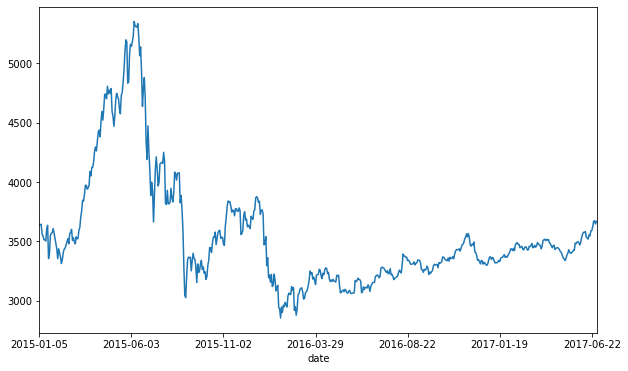

In [49]:
#其中我们非常关心收盘价，所以我们把收盘价绘制出来
hs300['close'].plot(figsize=(10, 6))

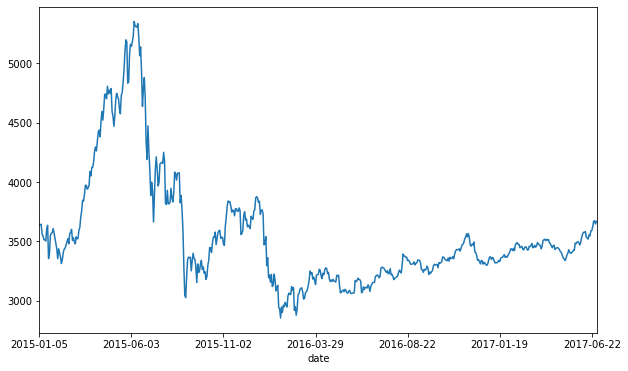

In [50]:
hs300.close.plot(figsize=(10, 6))     #等价；

In [51]:
data = ts.get_k_data('600030') #默认前复权价格；#这个600030是一支股票代码,没给日期，那么就默认是前复权价格，调整后的价格
data.head()

,date,open,close,high,low,volume,code
0,2017-04-25,15.479,15.403,15.527,15.393,367911.0,600030
1,2017-04-26,15.412,15.479,15.613,15.336,531654.0,600030
2,2017-04-27,15.470,15.508,15.527,15.384,427925.0,600030
3,2017-04-28,15.508,15.508,15.565,15.431,378799.0,600030
4,2017-05-02,15.527,15.393,15.537,15.374,322068.0,600030


In [52]:
data2 = ts.get_k_data('600030', autype='hfq') #不复权
data2.head()

,date,open,close,high,low,volume,code
0,2017-04-25,61.849,61.543,62.040,61.505,367911.0,600030
1,2017-04-26,61.582,61.849,62.383,61.276,531654.0,600030
2,2017-04-27,61.811,61.963,62.040,61.467,427925.0,600030
3,2017-04-28,61.963,61.963,62.193,61.658,378799.0,600030
4,2017-05-02,62.040,61.505,62.078,61.429,322068.0,600030


In [53]:
data3 = ts.get_k_data('600030', ktype = '5') #两个日期之间的前复权数据
data3.head()

,date,open,close,high,low,volume,amount,turnoverratio,code
0,2019-12-06 14:55,22.33,22.36,22.37,22.33,71447.0,{},7.2796,600030
1,2019-12-06 15:00,22.37,22.38,22.39,22.36,36757.0,{},3.7451,600030
2,2019-12-09 09:35,22.40,22.28,22.43,22.28,78224.0,{},7.9701,600030
3,2019-12-09 09:40,22.27,22.19,22.28,22.18,55427.0,{},5.6474,600030
4,2019-12-09 09:45,22.19,22.28,22.29,22.19,18342.0,{},1.8688,600030


In [54]:
data = ts.get_k_data(['600030','000001'])    #tushare API接口不支持多股票数据；
data

URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.34957672196856120" (found at least ' ')
URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.34957672196856120" (found at least ' ')
URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.34957672196856120" (found at least ' ')


""


#### Tushare获得历史逐笔交易数据

In [55]:
df = ts.get_tick_data('600030',date='2017-07-28')    #get_tick_data()
df.sort_index(inplace = True, ascending = False)
df.head(10)

AttributeError: 'NoneType' object has no attribute 'sort_index'

#### Tushare获得当前主流指数列表

In [56]:
df = ts.get_index()
df.head()   #显示部分主流指数

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,-0.40,3019.6395,3017.0658,3004.9376,3027.4835,3002.2601,215075755,2233.0504
1,000002,Ａ股指数,-0.40,3164.0702,3161.3655,3148.5880,3172.2716,3145.7838,214786757,2231.6591
2,000003,Ｂ股指数,0.55,253.0518,253.1074,254.4957,255.2223,252.7976,288998,1.3913
3,000008,综合指数,-0.19,2946.5961,2944.7551,2939.0323,2960.2985,2933.1978,47104493,462.2913
4,000009,上证380,-0.88,4774.2901,4771.9615,4729.9812,4782.6832,4728.3699,43964815,484.4633


#### Tushare获得股票的基本面信息

In [57]:
df = ts.get_stock_basics()         #基本面数据
date = df.ix['600848']['timeToMarket']
date

19940324

In [58]:
date = df.loc['600030']['timeToMarket']        #ix即将要被取消；
date

20030106

#### 获得所有股票基本面数据

In [59]:
data = ts.get_stock_basics()     #get_stocl_basics()
data.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
601512,N中新,园区开发,江苏,14.79,1.50,14.99,214.62,119.45,11.99,0.22,...,6.75,2.06,20191220,69.78,4.66,0.00,0.00,40.39,23.35,141209.0
688023,安恒信息,软件服务,浙江,0.00,0.15,0.74,8.88,5.70,2.68,3.09,...,19.13,7.92,20191105,0.86,1.16,0.00,0.00,68.31,-8.81,16241.0
600156,华升股份,纺织,湖南,0.00,4.02,4.02,11.61,6.77,1.08,1.48,...,1.79,2.93,19980527,1.42,0.35,9.46,-23.61,3.98,-3.54,30255.0
002365,永安药业,化学制药,湖北,32.57,2.41,2.95,18.86,7.29,9.74,7.01,...,5.46,1.89,20100305,5.90,2.00,38.74,-54.01,21.85,6.91,28478.0
600223,鲁商发展,区域地产,山东,27.11,10.01,10.01,571.49,556.16,8.11,1.09,...,2.58,2.59,20000113,13.61,1.36,28.45,47.53,19.49,2.64,25968.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 601512 to 688181
Data columns (total 22 columns):
name                3762 non-null object
industry            3762 non-null object
area                3762 non-null object
pe                  3762 non-null float64
outstanding         3762 non-null float64
totals              3762 non-null float64
totalAssets         3762 non-null float64
liquidAssets        3762 non-null float64
fixedAssets         3762 non-null float64
reserved            3762 non-null float64
reservedPerShare    3762 non-null float64
esp                 3762 non-null float64
bvps                3762 non-null float64
pb                  3762 non-null float64
timeToMarket        3762 non-null int64
undp                3762 non-null float64
perundp             3762 non-null float64
rev                 3762 non-null float64
profit              3762 non-null float64
gpr                 3762 non-null float64
npr                 3762 non-null float64
holders       

In [61]:
data.ix['600030'][['pe','esp']]     #pandas数据选择的复习；

pe     20.37
esp    0.868
Name: 600030, dtype: object

In [62]:
data.loc['600030'][['pe','esp']]

pe     20.37
esp    0.868
Name: 600030, dtype: object

In [63]:
data = ts.get_profit_data(2017,1)    #获得公司盈利数据；

[Getting data:]###########################################################

In [64]:
data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [65]:
data.set_index('code', inplace = True)

In [66]:
data.head()

,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
code,,,,,,,,
600423,ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [67]:
data.ix['600030'][['roe','net_profit_ratio']]

roe                 1.57
net_profit_ratio    26.7
Name: 600030, dtype: object

#### 获得非结构化新闻、舆情数据

In [68]:
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容

list index out of range


#### 获取龙虎榜信息

In [69]:
top_list = ts.top_list('2017-08-11')
top_list.head()

,code,name,pchange,amount,buy,sell,reason,bratio,sratio,date
0,000519,中兵红箭,5.7881,10331.03,8276.97,2054.06,日涨幅偏离值达到7%的前五只证券,0.12,0.03,2017-08-11
1,000615,京汉股份,8.6142,29848.69,23399.14,6449.55,日换手率达到20%的前五只证券,0.15,0.04,2017-08-11
2,000615,京汉股份,8.6142,29848.69,23399.14,6449.55,日涨幅偏离值达到7%的前五只证券,0.15,0.04,2017-08-11
3,000717,韶钢松山,-10.0314,14525.38,5268.84,9256.54,日跌幅偏离值达到7%的前五只证券,0.11,0.19,2017-08-11
4,000751,锌业股份,-9.9688,13448.01,4510.43,8937.59,日跌幅偏离值达到7%的前五只证券,0.05,0.10,2017-08-11


### 2.4 常用：优矿

可以通过优矿下载数据，并保存成CSV文件下载再导入；

In [70]:
# 获得某一只当天的tick数据；
data=DataAPI.MktTickRTIntraDayGet(securityID=u"000001.XSHE",startTime=u"09:30",endTime=u"15:00",field=u"",pandas="1")
data.to_csv('tick_data.csv')   #下载并保存数据以供分析；

NameError: name 'DataAPI' is not defined

In [ ]:
# 获得某一些股票具体某一天的因子数据；
DataAPI.MktStockFactorsOneDayGet(tradeDate=u"20170630",secID=u"",ticker=u"000001,600030",field=u"ticker,ROE,PE,PB",pandas="1")

In [ ]:
#某一只股票一段时间之内的因子数据；
DataAPI.MktStockFactorsDateRangeGet(secID=u"",ticker=u"000001",beginDate=u"20100101",endDate=u"20170616",field=u"tradeDate,ROE,PE,PB",pandas="1")

In [ ]:
# 获取交易日历
start_date = '2014-01-01'
end_date = '2017-07-01'
trading_date = DataAPI.TradeCalGet(exchangeCD=u"XSHG",beginDate=u"",endDate=u"",field=u"",pandas="1")
# trading_date.to_csv('trading_date.csv')
# 筛选2013年到2016年每月最后一个交易日的日期
print(trading_date)
month_end = trading_date[(trading_date['isMonthEnd']==1) & (trading_date['calendarDate']>start_date) & (trading_date['calendarDate']<end_date)]['calendarDate'].tolist()
print month_end

In [ ]:
# 获取某个日期以前上市的，正常交易或暂停交易的股票代码，格式为xxxxxx.XSHE或xxxxxx.XSHG
date = '2017-10-01'
stock_basics = DataAPI.EquGet(equTypeCD=u"A",secID=u"",ticker=u"",listStatusCD=u"",field=u"",pandas="1")
# stock_basics.to_csv('data/stock_basics.csv', encoding='GB18030')
valid_stocks = stock_basics.loc[(stock_basics['listDate']<date) & (stock_basics['listStatusCD'].isin(['L','S']))]['secID']
# valid_stocks.to_csv('data/valid_stocks.csv', encoding='GB18030')
print valid_stocks

In [ ]:
# 获取对应股票在对应日期的多个因子值
import pandas as pd

mkt_value = [DataAPI.MktStockFactorsOneDayGet(tradeDate=date,secID=valid_stocks,ticker=u"",field=["secID", 'LCAP','PE', 'REVS20', 'tradeDate'],pandas="1").set_index(['tradeDate', 'secID']) for date in month_end]
lcap = pd.concat(mkt_value, axis=0)
# lcap.to_csv('data/raw_factors.csv')
print lcap.head(5)

In [ ]:
# 每个月最后一个交易日计算市值最小的20只股票
import pandas as pd

min_cap_pool = {date: lcap['LCAP'][date].sort_values(ascending=True).index[:20] for date in month_end}
min_cap_pool = pd.DataFrame(min_cap_pool)
print min_cap_pool

## 3. 数据存储

HDF5

Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式。

经历了20多年的发展，HDF格式的最新版本是HDF5

In [19]:
import numpy as np
import pandas as pd
import tushare as ts

In [6]:
%time data = np.random.randn(500000,10)

Wall time: 471 ms


In [7]:
data.shape

(500000, 10)

In [8]:
data = pd.DataFrame(data)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [10]:
hdf5 = pd.HDFStore('data/random_number.h5', 'w')        #pd.HDFStore(),'w':write模式；知识生成了HDF5对象/文件；

In [ ]:
hdf5.      #tab

In [11]:
hdf5.open()       #打开刚刚创建的HDF5的文件；

In [12]:
hdf5['data'] = data      #设置主键的名字，名字叫做data；把data随机数数据已经存进HDF5文件；

In [13]:
hdf5.close()

In [14]:
hdf5 = pd.HDFStore('data/random_number.h5', 'r')      #'r'读取模式；

In [15]:
data_read = hdf5['data']     #读取hdf5中的数据并赋值给data_read

In [16]:
data_read.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [17]:
hdf5.close()

In [20]:
profit_data = ts.get_profit_data(2017,1)

[Getting data:]#######################################################

In [21]:
profit_data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [22]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 9 columns):
code                 3289 non-null object
name                 3289 non-null object
roe                  3281 non-null float64
net_profit_ratio     3284 non-null float64
gross_profit_rate    3284 non-null float64
net_profits          3288 non-null float64
eps                  3288 non-null float64
business_income      3288 non-null float64
bips                 3288 non-null float64
dtypes: float64(7), object(2)
memory usage: 231.3+ KB


In [23]:
hdf5 = pd.HDFStore('profit_data.h5', 'w')

In [24]:
hdf5['data'] = profit_data     #把刚刚从tushare上调取的利润数据存进HDF5文件里；

In [25]:
hdf5.close()

In [27]:
hdf5 = pd.HDFStore('profit_data.h5', 'r')

In [28]:
data_profit = hdf5['data']

In [29]:
data_profit.head(5)

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [30]:
data_profit[data_profit['roe']>15].head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [31]:
data_profit[(data_profit['roe']>15) & (data_profit['net_profit_ratio']>20)]      #数据库调取数据并进行多条件选股；


,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715
5,600225,*ST松江,22.84,146.43,24.9719,423.3024,0.4524,289.0652,0.3089
6,600230,沧州大化,21.94,39.66,55.6318,424.8125,1.4440,1070.9230,3.6402
7,600338,西藏珠峰,20.28,53.09,70.4140,305.8753,0.4684,576.0689,0.8821
8,000036,华联控股,18.32,42.51,71.4131,758.4114,0.6643,1783.7509,1.5625
9,300288,朗玛信息,18.30,85.96,26.9264,240.8041,0.7125,280.1342,0.8289
10,600291,西水股份,17.53,22.32,26.3018,2117.8868,1.9375,9488.7197,8.6808
13,600633,浙数文化,16.31,192.98,43.5107,1259.7513,0.9676,652.7781,0.5013
